In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [2]:
bbc = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/bbc-text.csv')

In [3]:
bbc.sample(5)

,category,text
175,business,chinese exports rise 25% in 2004 exports from ...
2085,tech,mobile games come of age the bbc news website ...
2152,politics,brown proud of economy record gordon brown h...
1067,business,ethiopia s crop production up 24% ethiopia pro...
651,entertainment,wife swap makers sue us copycat the british ...


In [4]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
category    2225 non-null object
text        2225 non-null object
dtypes: object(2)
memory usage: 34.8+ KB


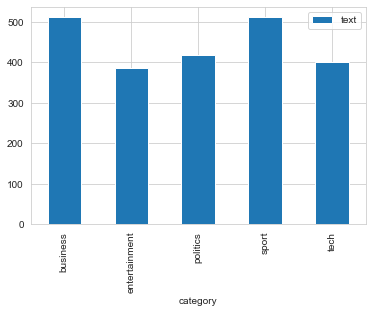

In [5]:
bbc.groupby('category').count().plot(kind='bar')

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=3, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(bbc['text']).toarray()
labels = bbc['category']

In [7]:
category2id = {0: 'business', 1: 'tech', 2: 'politics', 3: 'sport', 4: 'entertainment'}
id2category = {'business': 0, 'tech': 1, 'politics': 2, 'sport': 3, 'entertainment': 4}

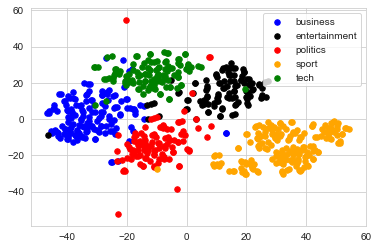

In [8]:
from sklearn.manifold import TSNE
colors = ['blue', 'green', 'red', 'orange', 'black']
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)    
features_ = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) 

for category, id in sorted(id2category.items()):
    points = features_[(labels[indices] == category).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[id], label=category)
plt.legend()

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LogisticRegression(random_state=0),
]

In [10]:
cv_df = pd.DataFrame(index=range(5 * len(models)))
result = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=5)
for fold_idx, accuracy in enumerate(accuracies):
    result.append((model_name, fold_idx, accuracy))

In [11]:
result

[('LogisticRegression', 0, 0.9775280898876404),
 ('LogisticRegression', 1, 0.9842696629213483),
 ('LogisticRegression', 2, 0.9865168539325843),
 ('LogisticRegression', 3, 0.9752808988764045),
 ('LogisticRegression', 4, 0.9887640449438202)]

In [12]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=96)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=96)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.values, y_pred)

0.9865269461077845

Text(0.5, 16.0, 'Predicted')

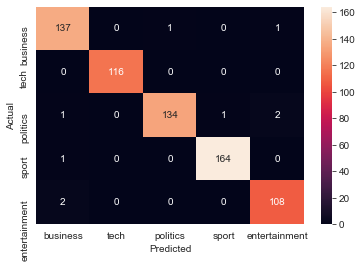

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category2id.values(), yticklabels=category2id.values())
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [15]:
############Cach tiep can so 2
from sklearn.model_selection import train_test_split

X = bbc['text']
y = bbc['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

pipeline = Pipeline([('tfidf', TfidfVectorizer(
                        input='array',
                        norm='l2',
                        max_features=None,
                        sublinear_tf=True,
                        stop_words='english')),
                    ('clf', SVC(
                        C=10,
                        kernel="rbf",
                        gamma=0.1,
                        probability=True,
                        class_weight=None,))])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(input='array', stop_words='english',
                                 sublinear_tf=True)),
                ('clf', SVC(C=10, gamma=0.1, probability=True))])

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = pipeline.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))

accuracy: 0.9730337078651685
classification report:
                precision    recall  f1-score   support

     business       0.95      0.97      0.96       106
entertainment       0.99      0.99      0.99        87
     politics       0.96      0.95      0.96        81
        sport       0.99      0.98      0.98        94
         tech       0.97      0.97      0.97        77

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445

confusion matrix:
 [[103   0   1   0   2]
 [  0  86   1   0   0]
 [  3   1  77   0   0]
 [  1   0   1  92   0]
 [  1   0   0   1  75]]


In [18]:
#########Cach tiep can so 3
bbc['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [19]:
import itertools
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
layers = keras.layers
models = keras.models


In [20]:
train_size = int(len(bbc) * .8)
print("Train size: %d" % train_size)
print("Test size: %d" % (len(bbc) - train_size))

Train size: 1780
Test size: 445


In [22]:
def train_test_split(bbc, train_size):
    train = bbc[:train_size]
    test = bbc[train_size:]
    return train, test

In [23]:
train_cat, test_cat = train_test_split(bbc['category'], train_size)
train_text, test_text = train_test_split(bbc['text'], train_size)

In [24]:
max_words = 1000
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words, char_level=False)

In [25]:
tokenize.fit_on_texts(train_text)
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

In [26]:
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

In [27]:
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [28]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print("y_train shape: ", y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1780, 1000)
x_test shape: (445, 1000)
y_train shape:  (1780, 5)
y_test shape: (445, 5)


In [29]:
batch_size = 32
epochs = 2
drop_ratio = 0.5

In [30]:
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(max_words,)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [31]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 1602 samples, validate on 178 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/2
1602/1602 [==============================] - 1s 535us/sample - loss: 0.4387 - acc: 0.8602 - val_loss: 0.1560 - val_acc: 0.9551
Epoch 2/2
1602/1602 [==============================] - 0s 246us/sample - loss: 0.0389 - acc: 0.9956 - val_loss: 0.1263 - val_acc: 0.9494


In [32]:
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

445/445 [==============================] - 0s 63us/sample - loss: 0.1356 - acc: 0.9483
Test loss: 0.13561439651451754
Test accuracy: 0.9483146


In [33]:
def run_experiment(bach_size, epochs, drop_ratio):
    print("batch size: {}, epochs: {}, drop_ratio: {}".format(batch_size, epochs, drop_ratio))
    model = models.Sequential()
    model.add(layers.Dense(512, input_shape=(max_words,)))
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(drop_ratio))
    model.add(layers.Dense(num_classes))
    model.add(layers.Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=0,
                      validation_split=0.1)
    score = model.evaluate(x_test, y_test,
                         batch_size=batch_size, verbose=0)
    print("\tTest loss: ", score[0])
    print("\tTest accuracy: ", score[1])

In [34]:
batch_size = 16
epochs = 4
drop_ratio = 0.4
run_experiment(batch_size, epochs, drop_ratio)

batch size: 16, epochs: 4, drop_ratio: 0.4
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
	Test loss:  0.11658289224913951
	Test accuracy:  0.95955056


In [35]:
text_labels = encoder.classes_

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print("Actual label:" + test_cat.iloc[i])
    print("Predicted label: " + predicted_label + "\n")

Actual label:entertainment
Predicted label: entertainment

Actual label:tech
Predicted label: tech

Actual label:politics
Predicted label: politics

Actual label:sport
Predicted label: sport

Actual label:sport
Predicted label: sport

Actual label:tech
Predicted label: tech

Actual label:business
Predicted label: business

Actual label:tech
Predicted label: tech

Actual label:entertainment
Predicted label: entertainment

Actual label:entertainment
Predicted label: entertainment



In [36]:
y_softmax = model.predict(x_test)
y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)
for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [39]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,  j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True label", fontsize=25)
    plt.xlabel("Predicted label", fontsize=25 )

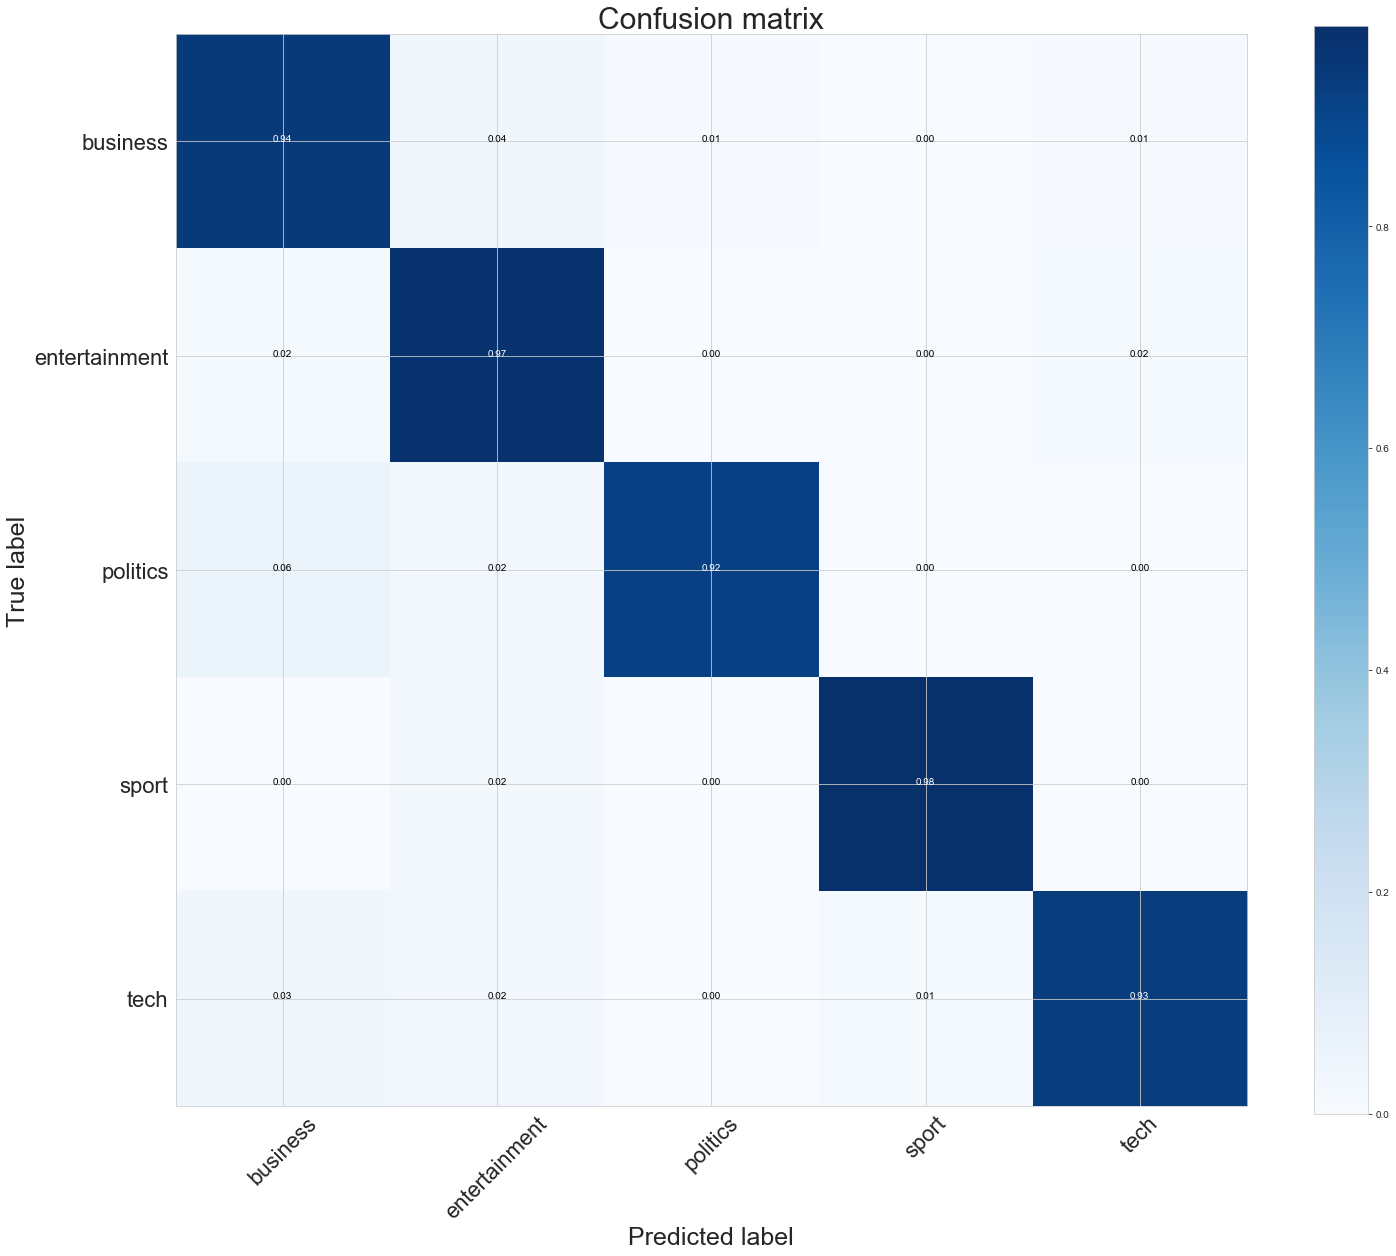

In [40]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24, 20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()